# Week 08: Scaling and polynomial features
### Introduction

In this set 8, we will not introduce new learning algorithms, but instead consider two useful tools for machine learning:

- Feature scaling
- Feature engineering: Polynomial features

To make it simple, we consider both of them in the context of (enhanced) linear regression. You should keep in mind, however, that

- They are equally relevant to classification as to regression.
- Feature scaling applies in similar ways to all learners using gradient descent.
- Polynomial features may be added to any linear learners.

To keep things even simpler, we will reuse a data set and some of the classes and methods we introduced in the exercise set week 07. We have therefore included the first half of the exercise set from week 07 here. What is new, comes from part B, below.

## From week 7: Linear and logistic regression
### Introduction

This week, we will get some first-hand experience with regression.
We will implement gradient descent for linear regression. Then we will proceed to classification, first by using linear regression and then logistic regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## NumPy
We will first familiarize ourselves a little with NumPy. A function which we will use over again is `linspace(x1,x2,N)` which makes a vector of length $N$ splitting the interval $[x1,x2]$ into equally sized intervals.

In [2]:
xx = np.linspace(-5,5,100)
xx[:10]

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909])

One of the major improvements from using NumPy is the possibilty of computing many values by applying a function to a numpy array.

In [3]:
y1 = -6*xx**3 + xx**2 -3*xx + 5

`y1`will contain the corresponding function values for each element `x`in `xx`. We may plot the result.

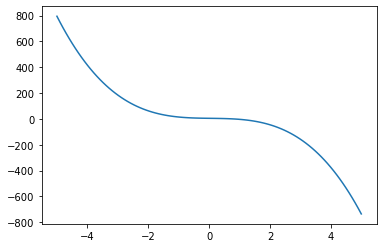

In [4]:
plt.plot(xx,y1)

## Dataset for linear regression
We will start with a smooth curve and add some "noise". The underlying idea is that the smooth curve represents the function we are looking for, and that this is the best we can hope to learn. A solution which does better  on the training material than the smooth curve is probably overfitted and will not generalize as well to new data as the smooth curve. We are using a normal distribution to generate noise. The numpy function `normal` will generate a vector of `size` many random points around `loc` from a distribution with standard deviation `scale`.

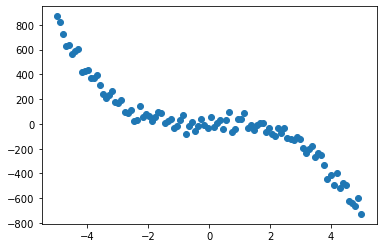

In [5]:
from numpy.random import normal
t = y1 + normal(loc=0, scale=50, size=100)
plt.scatter(xx, t)

Our training data now consist of pairs (xx[i], t[i]), where xx[i] is the datapoint and t[i] the target value. So far, both `xx` and `t` are vectors. Check their shapes, e.g., `xx.shape`. The goal is to make an implementation for linear regression which works with an arbitrary number of input variables and not just one. We will therefore transform `xx` to a matrix of dimension $M\times n$ where each row represents one datapoint, and n is the number of input variables (or features). Check the shape of `X` after the transform.

In [6]:
X = xx.reshape(-1,1)

#### Solution

In [7]:
xx.shape

(100,)

In [8]:
X.shape

(100, 1)

#### End of solution

## Part A: Linear regression

We will implement our own linear regression model. Our aim is to find an approximate function that fits the data generated above.

Since we are dealing with only one input variable, we start with a simple linear function, $f(x_1) = w_0 + w_1x_1$.

### Exercise 7.1: MSE

We wonder if our $f$ fits the data well, and what parameters will give us the best approximation. We will estimate this using the Mean Squared Error:

$\frac{1}{N} \sum_{j=1}^{N} (t_j - \sum_{i=0}^{m} w_ix_{ji})^2$

Write a function calculating MSE of our approximation.

In [ ]:
# Your code here

#### solution

In [9]:
def mse(y, y_pred):
    sum_errors = 0.
    for i in range(0,len(y)):
        sum_errors += (y[i] - y_pred[i])**2
    mean_squared_error = sum_errors/len(y)
    return mean_squared_error

In [10]:
# Vector form solution
def mse_2(x,y):
    return sum((x - y)**2) /x.shape[0]

#### end of solution

### Exercise 7.2: testing the MSE
To test our implementation, we can take the function $f(x_1)=0$ as a baseline and calculate the MSE for this $f$. Also calculate the Root Means Square Error which provides a more natural measure for how good the fit is.

#### solution

In [11]:
hypothesis = np.array([0 for x in xx])
mse = mse_2(hypothesis, t)
print("MSE: ", mse)

MSE:  95281.91098248075


In [12]:
print("RMSE: ", np.sqrt(mse))

RMSE:  308.6776813805636


#### end of solution

### Exercise 7.3: Adding bias

We will implement linear regression with gradient descent and test it on the data. To make it simple, we will add a $x_0=1$ to all our datapoints, and consider $f(x_1) = w_0 + w_1x_1$ as $f(x_0, x_1) = w_0x_0+ w_1x_1$. Make a procedure that does this.

In [13]:
def add_bias(X):
    """X is a Nxm matrix: N datapoints, m features
    Return a Nx(m+1) matrix with added bias in position zero"""
    pass

#### solution

In [14]:
def add_bias(X):
    """X is a Nxm matrix: N datapoints, m features
    Return a Nx(m+1) matrix with added bias in position zero"""
    sh = X.shape
    m = sh[0]
    bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
    # Concatenate the column of bias in front of the columns of X.
    return np.concatenate((bias, X), axis  = 1) 

#### end  of solution

### Exrcise 7.4: Gradient Descent
We will implement the linear regression in a class as we did with the classifiers earlier. The fit method will run the gradient descent step a number of times to train the classifier. The predict method should take a matrix containing several data points and predict the outcome for all of them. Fill in the methods.

Assume that the matrix of training data are not extended with bias features. Hence, make adding bias a part of your methods.

After training there should be an attribute with learned coeffecients (weights) which is applied by the predict method.

In [ ]:
class NumpyLinReg():

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        pass


#### solution

In [15]:
class NumpyLinReg():

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (N, m) = X_train.shape
        X_train = add_bias(X_train)
        
        self.weights = weights = np.zeros(m+1)
        
        for e in range(epochs):
            weights -= eta / N *  X_train.T @ (X_train @ weights - t_train)      
    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        Z = add_bias(X)
        return Z @ self.weights

#### end of solution

### Exercise 7.5: Train and test the model
Fit the model to the training data. Report the coefficients. Plot the line together with the observations. Calculate the RMSE. Is the result a better fit than the baseline constant function $f(x)=0$?

#### solution

In [16]:
reg = NumpyLinReg()
reg.fit(X,t, epochs=100)
print("The coefficients: ", reg.weights)

The coefficients:  [ 13.36107234 -95.62617905]


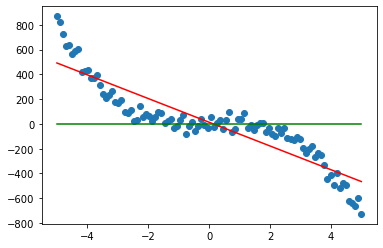

In [17]:
plt.plot(X, reg.weights[0]+reg.weights[1]*X, color="r")
plt.plot(X, [0 for i in X], 'g')

# The generated dataset
plt.scatter(X, t)

In [18]:
error = mse_2(t, add_bias(X) @ reg.weights)
print("MSE: ", error)

MSE:  17360.87667670058


In [19]:
print("RMSE :", np.sqrt(error))

RMSE : 131.7606795546402


It has improved

#### end of solution

## End of week 07

# Here starts the real set 8

## Part B: Closed form solution

(If you find this part difficult, you may skip it and move to the rest of the exercise set which does not depend on you doing this part.)

We mentioned in the lectures that the linear regression problem has a closed-form solution. Say that we have a linear regression problem where we try to predict $y$ from $x_1, x_2, \ldots,x_n$ by a linear formula  $f(\mathbf{x})=w_0+w_1x_1+\cdots+w_nx_n$ on the basis of $N$ observations of the form $(\mathbf{x}_i, t_i)$.
If we extend each observation with a bias $x_0=1$ and put the $\mathbf{x}_i$-s into a 
$(N\times(n+1))$ matrix, and the $t_i$-s into a $N\times 1$ column matrix $Y$, as we have done above, then we can find the weights (coeffecients/parameters) with the formula
$W =\theta = (X^T X)^{-1}X^TY$.
 
Some explanation to the formula. A square matrix $A$ is called the *identity matrix* if $A[i,i]=1$ for all $i$, and $A[i,j]=0$ if $i\neq j$. We use $I$ as a name of this matrix. It is called the *identity matrix* because $AI=IA=A$ for all $A$.

Given a square matrix $A$. If there exists a matrix $B$, such that $AB=BA=I$, we will say that $B$ is the *inverse* of $A$ and write this $B=A^{-1}$. Not all matrices have inverses.

In NumPy, the function `np.linalg.inv(X)` yields the inverse of `X` if it exists.

We wil not try to explain why the formula $\theta = (X^T X)^{-1}X^TY$ yields the correct solution.

### Exercise 8.1: closed form solution
Find the closed form solution to the dataset above and compare it to the solution you found by gradient descent.

## Part C: Scaling the data

In the lectures, we mentioned the importance of scaling/normalizing/standardizing the data for the *k*NN algorithm. We will here consider why scaling is important for gradient descent-based algorithms. Let's see the effects of this on a practical example.

### Dataset

First, we'll load a dataset with features that intentionally vary in scale. "ex1data2.txt" (https://github.com/nex3z/machine-learning-exercise) is a dataset of housing prices, including the size of the house (in square feet), the number of bedrooms, and the price of the house in dollars.

For the record, 100 sqm is about the same as 1100 sq. feet.

In [ ]:
data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")

Let us inspect what the data looks like:

In [ ]:
data[:10,:]

The goal is to predict the price from the size and the number of bedrooms, so we start by splitting the input data from the target values.

In [ ]:
X2 = data[:, 0:2]
t2 = data[:, 2]

### Exercise 8.2: Without scaling

First, let's try to fit our NumpyLinReg to the data. Experiment with various training rates and number of epochs. Print the weights (coeffecients). Try to predict the price of a 3-bedroom 1500 sq. feet house. What do you see?

### Exercise 8.3: Scaling

The reason for our problems is the large difference in scale between our two input features -- 3 orders of magnitude. A good idea could be to scale the data before you start to experiment. Implement a max-min scaler and scale your data. By the way, it is only the input data `X2` which have to be scaled. It is normally not necessary to scale the output values `t2`/`y`.

### Exercise 8.4: With scaling
Try to fit a linear regression to the scaled data. Experiment with various training rates and number of epochs. Print the weights (coeffecients). Try to predict the price of a 3-bedroom 1500 sq. feet house. How does this go compared to the experiments without scaling?

## Part D: Polynomial features
We return to our first dataset, (X,t) from exercise set week07. We tried to fit a straight line to our dataset. From the way the set was generated, we think we would get a better fit if we try to predict a polynomial. We will now try to fit a polynomial. One way of achieving this is to extend our dataset with more features corresponding to the polynomial.

We can add features for $x^2$, $x^3$, $x^4$, $x^5$, etc. to the data set. Since the resulting features will have different scales, after adding the polynomial features, we should scale all the features (except the bias, of course). Then we can try to fit a linear expression (a hyperplane) to the data. 

### Exercise 8.5
Add features for $x^2$ and $x^3$. Scale the data. Fit a linear regression model to the data. Calculate the MSE. Compare to the MSE for the linear model. Plot the polynomial together with the dataset.